Số lượng ảnh train: 1081
Số lượng ảnh test: 840
Các class: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Kích thước ảnh: torch.Size([3, 224, 224])
Nhãn: 0 (butterfly)


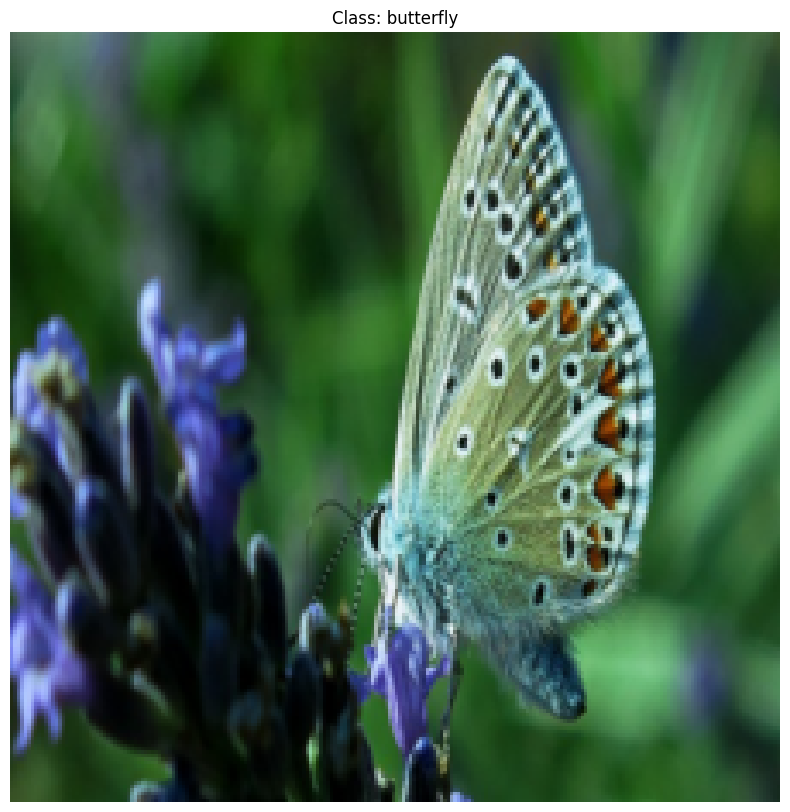

Số lượng ảnh train: 1081
Số lượng ảnh test: 840
Các class: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Batch shape: torch.Size([16, 3, 224, 224])
Labels shape: torch.Size([16])


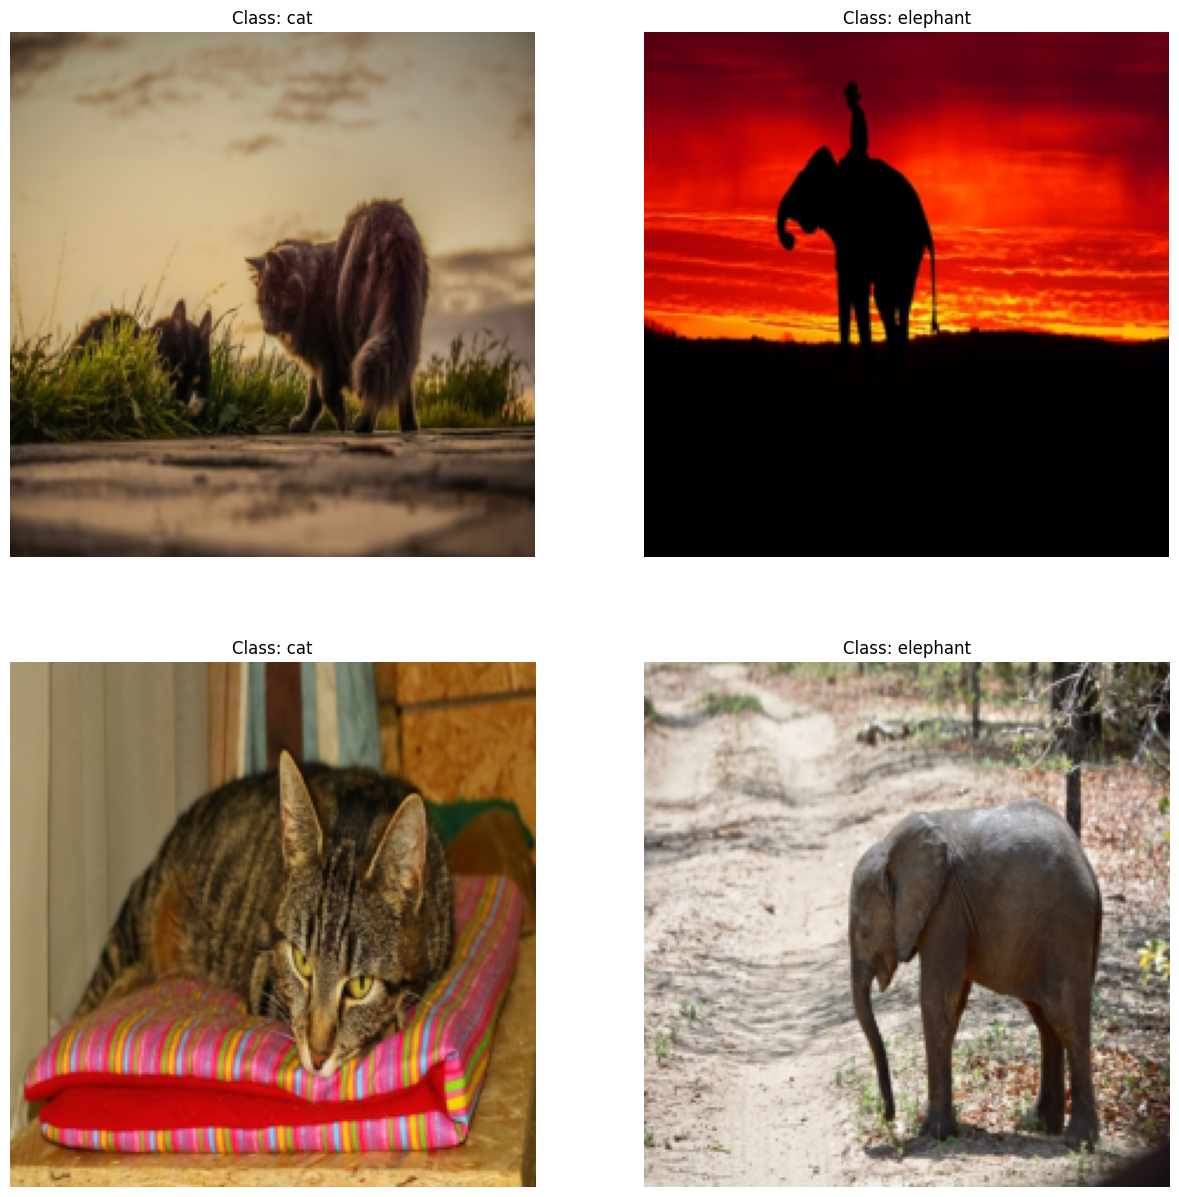

In [4]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

class AnimalDataset(Dataset):
    def __init__(self, root, train=True):
        self.root = root
        self.train = train
        self.images = []
        self.labels = []

        # Định nghĩa transform
        # Fix lỗi: stack expects each tensor to be equal size, but got [3, 426, 640] at entry 0 and [3, 423, 640] at entry 1 (các ảnh trong dataset có kích thước khác nhau)
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),  # Resize về kích thước cố định
            transforms.ToTensor(),  # Chuyển thành tensor và chuẩn hóa về [0,1]
        ])
        
        # Xác định đường dẫn train hoặc test
        data_dir = os.path.join(root, "train" if train else "test")
        
        # Lấy danh sách các class (tên thư mục con), bỏ qua file hệ thống (Fix lỗi: Not a directory: 'animals/train/.DS_Store')
        self.classes = sorted([d for d in os.listdir(data_dir) 
                             if os.path.isdir(os.path.join(data_dir, d)) and not d.startswith('.')])
        
        # Duyệt qua từng class
        for label, class_name in enumerate(self.classes):
            class_dir = os.path.join(data_dir, class_name)
            
            # Duyệt qua từng file ảnh trong thư mục class
            for img_name in os.listdir(class_dir):
                # Chỉ lấy file jpg và bỏ qua file hệ thống
                if img_name.endswith('.jpg') and not img_name.startswith('.'):
                    img_path = os.path.join(class_dir, img_name)
                    self.images.append(img_path)
                    self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Đọc ảnh
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')  # Đảm bảo ảnh là RGB
        
        # Áp dụng transform
        image = self.transform(image)
        label = self.labels[idx]
        
        return image, label


# Test code
if __name__ == '__main__':
    # Khởi tạo dataset
    train_dataset = AnimalDataset(root="animals", train=True)
    test_dataset = AnimalDataset(root="animals", train=False)

    print(f"Số lượng ảnh train: {len(train_dataset)}")
    print(f"Số lượng ảnh test: {len(test_dataset)}")
    print(f"Các class: {train_dataset.classes}")

    # Lấy một mẫu để kiểm tra
    image, label = train_dataset[0]
    print(f"Kích thước ảnh: {image.shape}")
    print(f"Nhãn: {label} ({train_dataset.classes[label]})")
    
    # # Show ảnh = OpenCV
    # # Chuyển tensor về numpy array, chuyển kênh về (H,W,C) và chuyển từ RGB sang BGR
    # img_cv = image.permute(1, 2, 0).numpy()
    # img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)
    # # Chuyển về khoảng [0,255] và kiểu uint8
    # img_cv = (img_cv * 255).astype(np.uint8)
    
    # cv2.imshow(f"Class: {train_dataset.classes[label]}", img_cv)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Show ảnh bằng matplotlib
    plt.figure(figsize=(10, 10))
    img_show = image.permute(1, 2, 0).numpy()
    plt.imshow(img_show)
    plt.title(f"Class: {train_dataset.classes[label]}")
    plt.axis('off')
    plt.show()

    #=========================
    print(f"Số lượng ảnh train: {len(train_dataset)}")
    print(f"Số lượng ảnh test: {len(test_dataset)}")
    print(f"Các class: {train_dataset.classes}")

    # Tạo dataloader
    train_loader = DataLoader(
        dataset=train_dataset,
        batch_size=16,
        shuffle=True,
        num_workers=0
    )

    # In ra kích thước batch và hiển thị một số ảnh
    for images, labels in train_loader:
        print(f"Batch shape: {images.shape}")
        print(f"Labels shape: {labels.shape}")
        
        # Hiển thị 4 ảnh đầu tiên trong batch
        plt.figure(figsize=(15, 15))
        for i in range(min(4, len(images))):
            plt.subplot(2, 2, i+1)
            # Chuyển tensor về numpy array và chuyển kênh về (H,W,C)
            img = images[i].permute(1, 2, 0).numpy()
            plt.imshow(img)
            plt.title(f"Class: {train_dataset.classes[labels[i]]}")
            plt.axis('off')
        plt.show()
        break